In [1]:
# imports
from CLEAN3 import doCLEAN,gauss2D, idealPSF
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# preparing support size
imsize=256
img=np.array((imsize,imsize))

In [3]:
# preparing gridding
x=np.arange(0,imsize)-imsize//2
y=np.arange(0,imsize)-imsize//2
xx,yy=np.meshgrid(x,y)

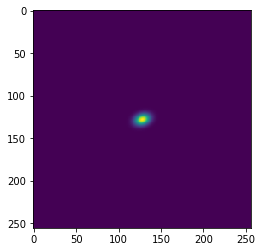

In [4]:
# PSF
PSF=gauss2D(xx,yy,1,0,0,5,0.3,-0.2)  # gridx, gridy, amp, meanx, meany, std, e1, e2

plt.imshow(PSF)

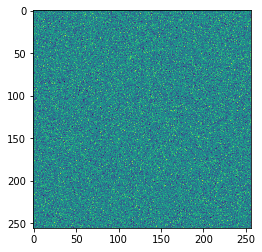

In [5]:
# preparing background noise
sigma=30
noise=np.random.randn(256,256)*sigma

plt.imshow(noise)

In [6]:
# Preparing sky parameters
Nsrc=5   # number of sources
pad=20.  # avoid putting sources too close 
MaxFluxdensity=1e3   #  max flux 

std=5.   # width of sources
meanx=np.random.randint(-imsize//2+pad,imsize//2-pad,size=Nsrc)  # random location of sources in x
meany=np.random.randint(-imsize//2+pad,imsize//2-pad,size=Nsrc)  # random location of sources in y
Amp=np.random.rand(Nsrc)*MaxFluxdensity # random flux density
e1,e2= 0.5 * np.random.randn(2) - 0.25

Text(0, 0.5, 'y')

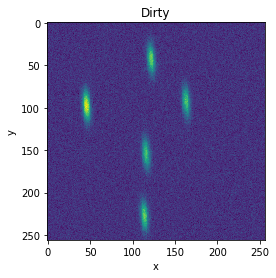

In [7]:
# Creating sky
dirty=np.zeros((imsize,imsize))
for isrc in np.arange(Nsrc):
    tmpg=gauss2D(xx,yy,Amp[isrc],meanx[isrc],meany[isrc],std,e1,e2)
    dirty=dirty+tmpg  # feeling dirty

dirty=dirty+noise # adding noise background
plt.imshow(dirty, interpolation='none')
plt.title('Dirty')
plt.xlabel('x')
plt.ylabel('y')

/gpfslocalsup/pub/anaconda-py3/2019.10/envs/tensorflow-gpu-1.15.2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/gpfslocalsup/pub/anaconda-py3/2019.10/envs/tensorflow-gpu-1.15.2/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/gpfslocalsup/pub/anaconda-py3/2019.10/envs/tensorflow-gpu-1.15.2/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        5.000e+00, 3.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 6.000e+00,
        6.000e+00, 5.000e+00, 9.000e+00, 7.000e+00, 5.000e+00, 6.000e+00,
        1.300e+01, 2.400e+01, 2.000e+01, 1.900e+01, 2.200e+01, 2.200e+01,
        2.500e+01, 4.000e+01, 3.700e+01, 5.300e+01, 5.300e+01, 5.800e+01,
        7.500e+01, 9.500e+01, 9.200e+01, 1.010e+02, 1.100e+02, 1.430e+02,
        1.530e+02, 1.900e+02, 2.180e+02, 2.520e+02, 2.680e+02, 3.430e+02,
        3.680e+02, 4.090e+02, 4.910e+02, 5.370e+02, 6.120e+02, 7.050e+02,
        8.250e+02, 9.320e+02, 9.560e+02, 1.127e+03, 1.260e+03, 1.463e+03,
        1.520e+03, 1.613e+03, 1.818e+03, 1.896e+03, 2.104e+03, 2.027e+03,
        2.003e+03, 1.977e+03, 1.636e+0

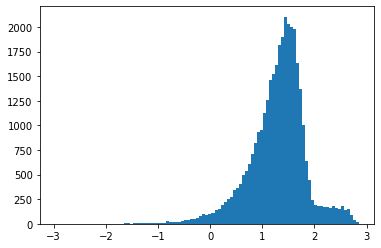

In [8]:
plt.hist(np.log10(dirty.flatten()),bins=101)

In [9]:
# running CLEAN
restored,restorednores,residual,skymodellist,skymodelimg=doCLEAN(dirty,PSF,gain=0.1,niter=5000,fthresh=3*sigma)

Text(0, 0.5, 'y')

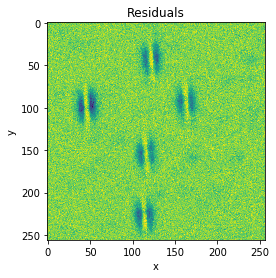

In [10]:
plt.imshow(residual, interpolation='none')
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('y')

/gpfslocalsup/pub/anaconda-py3/2019.10/envs/tensorflow-gpu-1.15.2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 9.000e+00, 1.200e+01, 2.100e+01, 2.500e+01, 2.900e+01,
        4.700e+01, 6.400e+01, 7.500e+01, 1.250e+02, 1.660e+02, 2.260e+02,
        3.480e+02, 5.060e+02, 6.460e+02, 9.810e+02, 1.315e+03, 1.841e+03,
        2.340e+03, 3.220e+03, 3.815e+03, 4.558e+03, 4.195e+03, 2.634e+03,
        9.320e+02]),
 array([-2.66744204, -2.51836763, -2.36929323, -2.22021882, -2.07114442,
        -1.92207001, -1.7729956 , -1.6239212 , -1.47484679, -1.32577238,
        -1.17669798, -1.02762357, -0.87854916, -0.72947476, -0.58040035,
        -0.43132595, -0.28225154, -0.13317713,  0.01589727,  0.16497168,
         0.31404609,  0.46312049,  0.6121949 ,  0.7612693 ,  0.91034371,
         1.05941812,  1.20849252,  1.35756693,  1.50664134,  1.65571574,
         1.80479015,  1.95386455]),
 <a list of 31 Patch objects>)

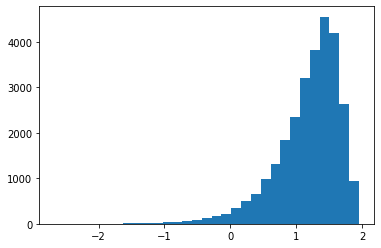

In [11]:
plt.hist(np.log10(residual.flatten()),bins=31)

Text(0, 0.5, 'y')

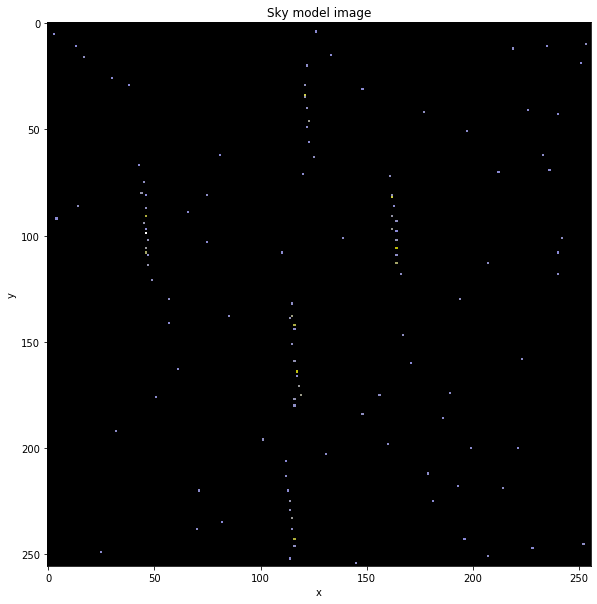

In [12]:
f=plt.figure(figsize=(10,10))
plt.imshow(np.log10(np.abs(skymodelimg)+1), cmap='gist_stern',interpolation='none')
plt.title('Sky model image')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

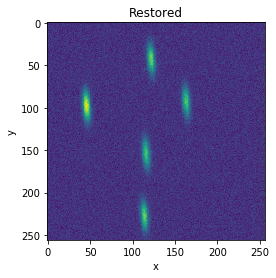

In [13]:
plt.imshow(restored, interpolation='none')
plt.title('Restored')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

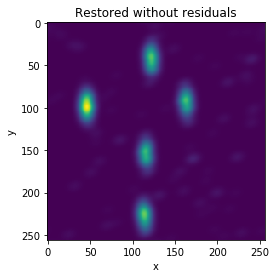

In [14]:
plt.imshow(restorednores, interpolation='none')
plt.title('Restored without residuals')
plt.xlabel('x')
plt.ylabel('y')

## Test PSF fitting

In [15]:
# extract parameters

PSF1 = idealPSF(PSF)
PSF1

array([  1. , 128. , 128. ,   5. ,   0.3,  -0.2])

In [16]:
print(PSF1)
# generate fitted PSF
cleanPSF = gauss2D(xx,yy,1,0,0,5,0.3,-0.2)

[  1.  128.  128.    5.    0.3  -0.2]


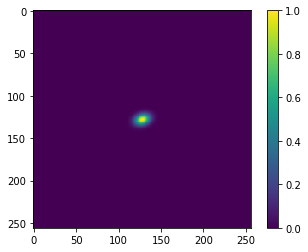

In [17]:
plt.imshow(PSF);plt.colorbar()

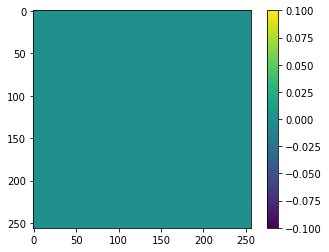

In [18]:
# compare PSF and cleanPSF
plt.imshow((cleanPSF-PSF));plt.colorbar()